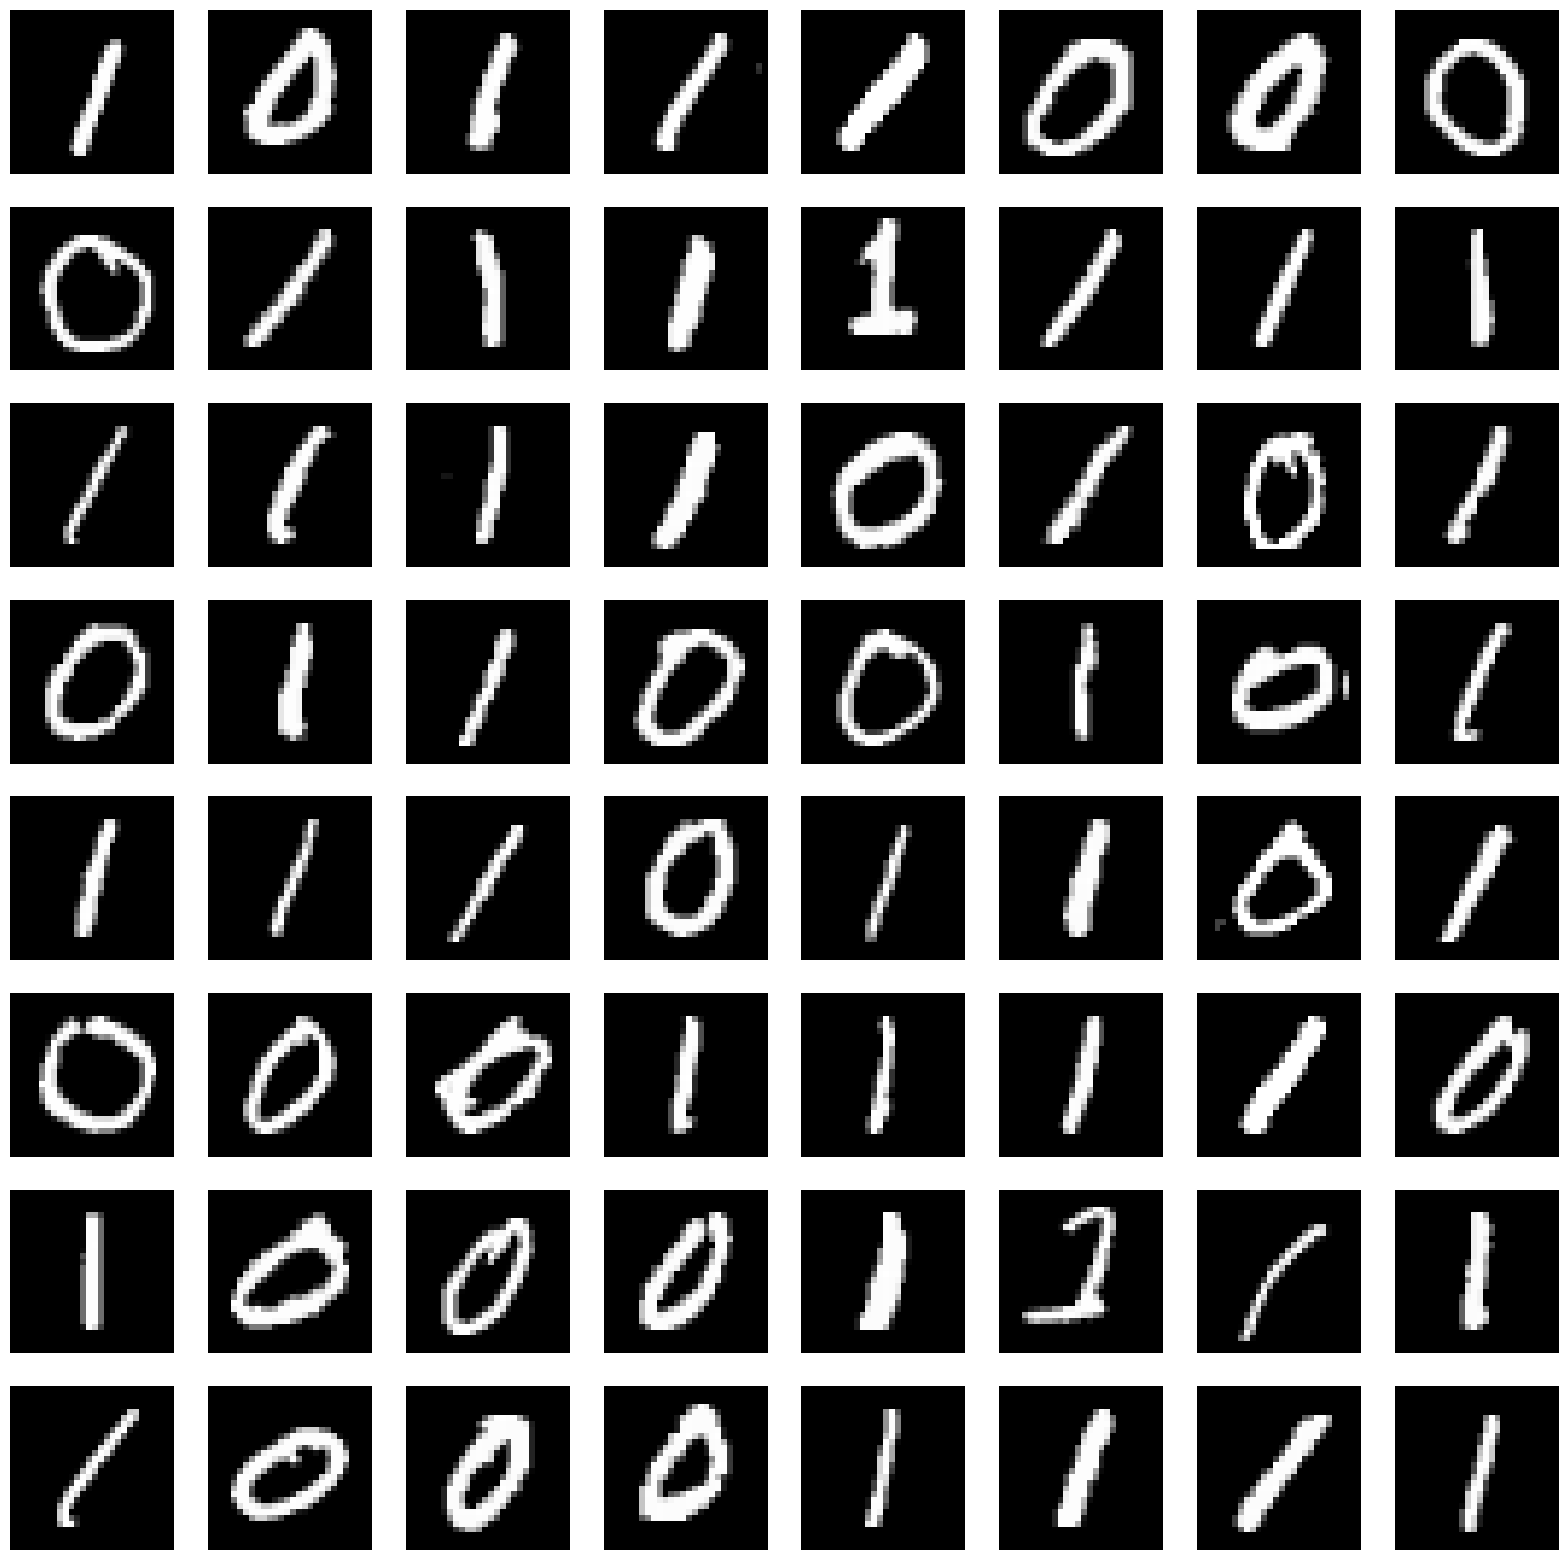

In [36]:
from demo import *

images, labels = get_dataset('ones_and_zeros')

In [45]:
X = images.reshape((images.shape[0], -1))
y = labels

In [47]:
def linear_function(X, w):
    w, b = w[:-1], w[-1]
    return np.dot(X, w) + b

def predict(X, w):
    return (linear_function(X, w) > 0).astype(float)

In [49]:
w = np.zeros((X.shape[1] + 1,))
predict(X, w)

(12665,)

In [50]:
def accuracy(X, y, w):
    return np.mean(predict(X, w) == y)

In [51]:
accuracy(X, y, w)

0.46766679826292934

In [52]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def predict_probability(X, w):
    return sigmoid(linear_function(X, w))

In [53]:
predict_probability(X, w)

array([0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5])

In [57]:
def nll(w, X, y):
    xw = linear_function(X, w)
    py = sigmoid((2 * y - 1) * xw)
    return -np.sum(np.log(py))

In [58]:
nll( w, X, y)

8778.709041791706

In [62]:
X.shape

(12665, 784)

In [65]:
xw = linear_function(X, w)
py = sigmoid((2 * y - 1) * xw)
grad = ((1 - py) * (2 * y - 1)).reshape((-1, 1)) * X
grad.shape

(12665, 784)

In [72]:
def gradient(w, X, y):
    xw = linear_function(X, w)
    py = sigmoid((2 * y - 1) * xw)
    grad = ((1 - py) * (2 * y - 1)).reshape((-1, 1)) * np.pad(X, [(0,0), (0,1)], constant_values=1.)
    return -np.sum(grad, axis=0)


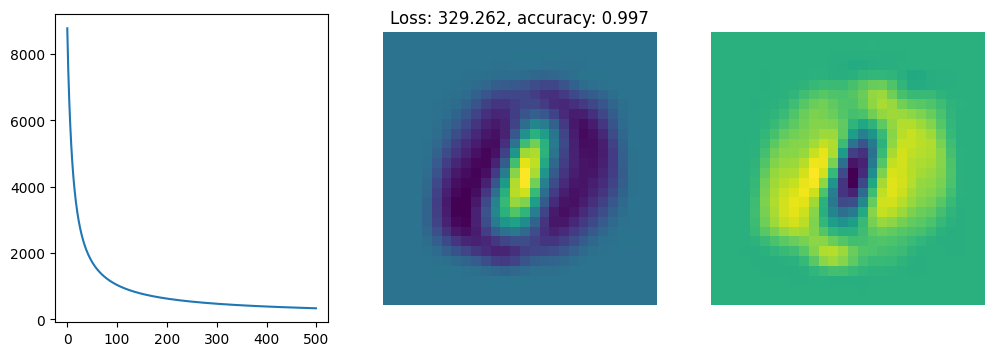

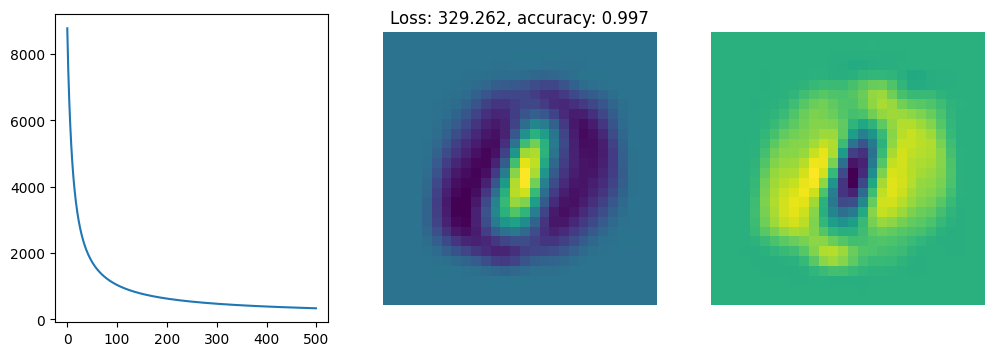

In [75]:
import time
from IPython import display

def nll_and_grad(w, X, y):
    return nll(w, X, y), gradient(w, X, y)

def gradient_descent(value_and_grad, w0, lr, steps, X, y):
    f, ax = plt.subplots(1, 3, figsize=(12,4))

    losses = []
    weights = w0
    for i in range(steps):
        loss, g = value_and_grad(weights, X, y)
        weights = weights - lr * g
        losses.append(loss)


        # Plotting code
        
        [a.cla() for a in ax]
        display.clear_output(wait =True)
        
        ax[1].axis('off')
        ax[2].axis('off')
        ax[0].plot(losses)
        ax[1].imshow(weights[:-1].reshape(images[0].shape))
        ax[2].imshow(g[:-1].reshape(images[0].shape))
        ax[1].set_title('Loss: %.3f, accuracy: %.3f' % (loss, accuracy(X, y, weights)))
        display.display(f)
        time.sleep(0.001)
        
    return weights, losses

w = np.zeros(X.shape[1] + 1)
weights, losses = gradient_descent(nll_and_grad, np.zeros_like(w), 0.0000003, 500, X, y)
